In [1]:
!pip install tensorboard pandas
!pip install matplotlib seaborn
!pip install tensorflow

In [2]:
import os

In [13]:
path = '/home/asap7772/asap7772/highway-env/data'
lst = []
for root, dirs, files in os.walk(path, topdown=False):
    for name in files:
      x = os.path.join(root, name)
      if 'tfevents' in x:
        lst.append(x)
        print('added: ', x)

added:  /home/asap7772/asap7772/highway-env/data/exp_env=highway-fast-v0_batch_size=256_discount=0.975_num_layers=2_layer_size=256_learning_rate=0.0003_with_minq=True_min_q_weight=1.0_method=True_method_temp=3.0/CQL_1/events.out.tfevents.1650874100.alan.16046.0
added:  /home/asap7772/asap7772/highway-env/data/exp_env=highway-fast-v0_batch_size=256_discount=0.975_num_layers=2_layer_size=256_learning_rate=0.0003_with_minq=True_min_q_weight=2.0_method=False_method_temp=50.0/CQL_1/events.out.tfevents.1650909568.alan.15993.0
added:  /home/asap7772/asap7772/highway-env/data/exp_env=highway-fast-v0_batch_size=256_discount=0.975_num_layers=2_layer_size=256_learning_rate=0.0003_with_minq=True_min_q_weight=1.0_method=False_method_temp=50.0/CQL_1/events.out.tfevents.1650909573.alan.15992.0
added:  /home/asap7772/asap7772/highway-env/data/exp_env=highway-fast-v0_batch_size=256_discount=0.975_num_layers=2_layer_size=256_learning_rate=0.0003_with_minq=True_min_q_weight=0.1_method=True_method_temp=20

# Plotting TensorBoard

In [14]:
!pip install packaging

In [15]:
from packaging import version

import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats
import tensorboard as tb

In [16]:
major_ver, minor_ver, _ = version.parse(tb.__version__).release
assert major_ver >= 2 and minor_ver >= 3, \
    "This notebook requires TensorBoard 2.3 or later."
print("TensorBoard version: ", tb.__version__)

TensorBoard version:  2.8.0


In [17]:
from tensorflow.python.summary.summary_iterator import summary_iterator
from collections import defaultdict
def get_data(path, prefix=''):
    data = defaultdict(list)
    for e in summary_iterator(path):
        for v in e.summary.value:
            data[v.tag].append(v.simple_value)
    return data
dcts = [get_data(x) for x in lst]
print(dcts[0].keys())

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
dict_keys(['rollout/ep_len_mean', 'rollout/ep_rew_mean', 'rollout/exploration_rate', 'time/fps', 'train/all_q_max', 'train/all_q_mean', 'train/all_q_min', 'train/all_q_std', 'train/cql_loss_max', 'train/cql_loss_mean', 'train/cql_loss_min', 'train/cql_loss_std', 'train/data_q_max', 'train/data_q_mean', 'train/data_q_min', 'train/data_q_std', 'train/learning_rate', 'train/loss', 'train/method_temp', 'train/n_updates', 'train/orig_cql_loss_max', 'train/orig_cql_loss_mean', 'train/orig_cql_loss_min', 'train/orig_cql_loss_std', 'train/td_loss_max', 'train/td_loss_mean', 'train/td_loss_min', 'train/td_loss_std', 'train/weight_max', 'train/weight_mean', 'train/weight_min', 'train/weight_std', 'eval/mean_ep_length', 'eval/mean_reward'])


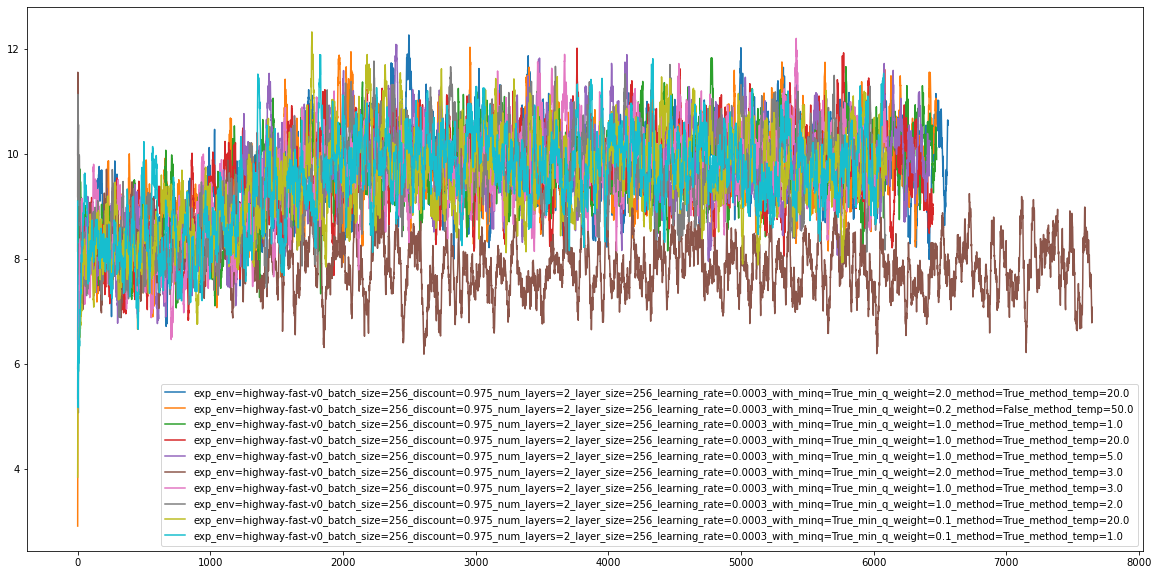

In [28]:
import heapq

plt.figure(figsize=(20,10))


pq = []
i = 0
for dct in dcts:
    if dct['rollout/ep_rew_mean'] == []:
        continue
    heapq.heappush(pq, (-sum(dct['rollout/ep_rew_mean']), dct, i))
    i += 1

for i in range(10):
    val,dct,i = heapq.heappop(pq)
    plt.plot(dct['rollout/ep_rew_mean'], label=lst[i].split('/')[-3])
plt.legend()
plt.show()

In [23]:
from tensorflow.python.summary.summary_iterator import summary_iterator
from collections import defaultdict

def plot_tensorboard(path, prefix=''):
    data = defaultdict(list)
    for e in summary_iterator(path):
        for v in e.summary.value:
            data[v.tag].append(v.simple_value)
    
    # Plot the dataframe
    for col in data:
        plt.figure()
        plt.plot(data[col])
        plt.title(prefix + col)
        plt.show()
    

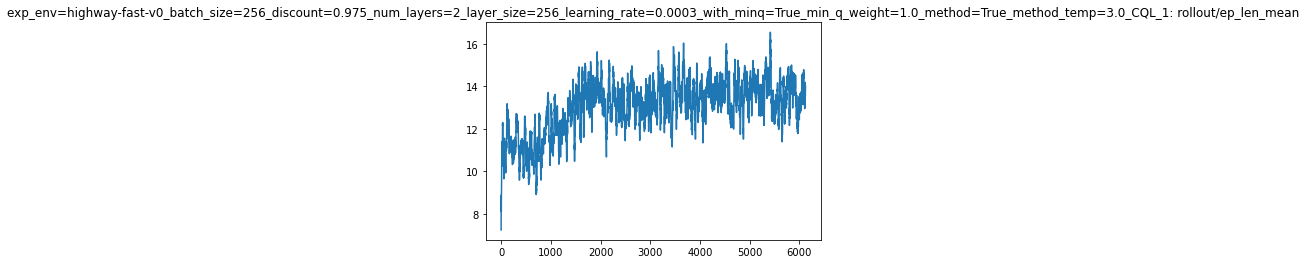

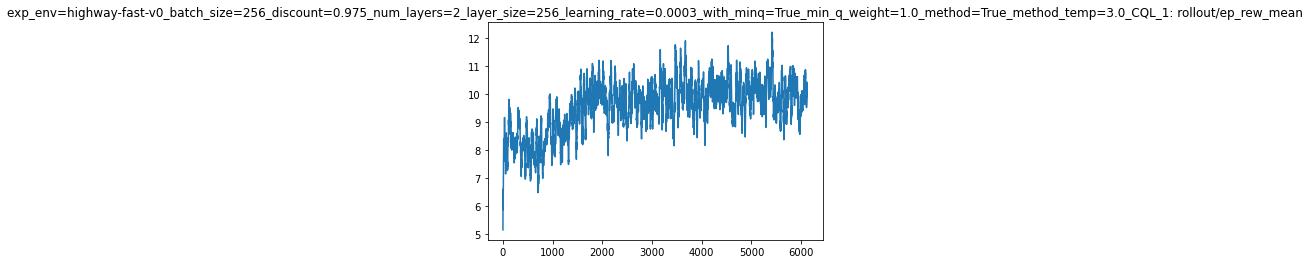

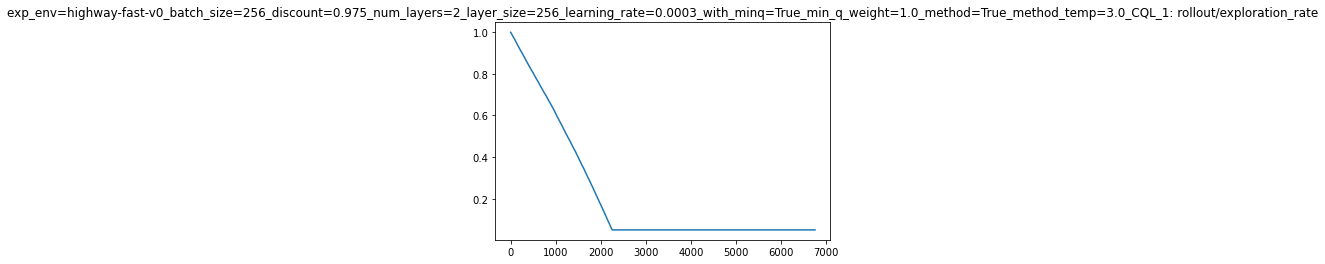

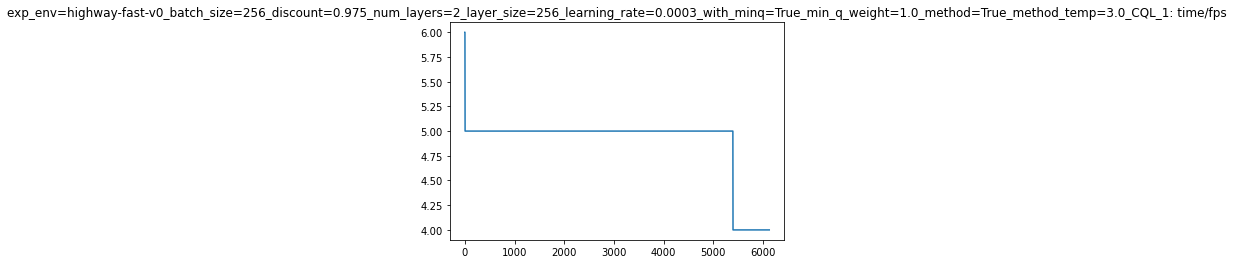

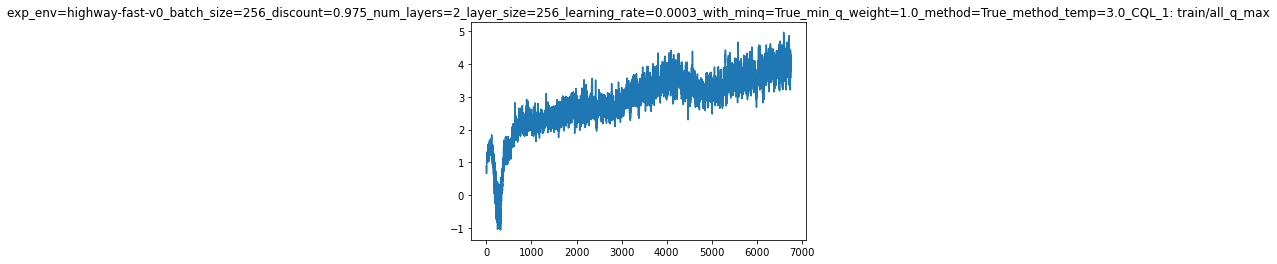

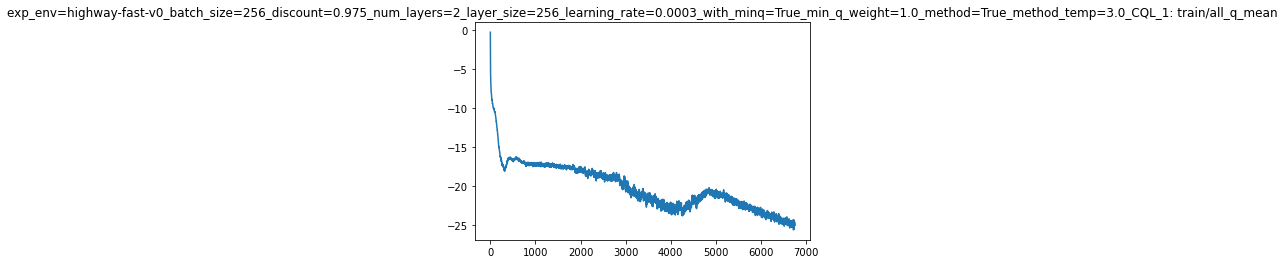

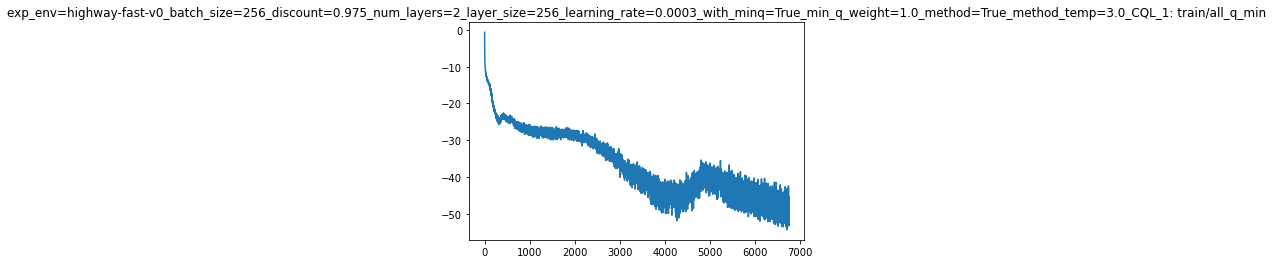

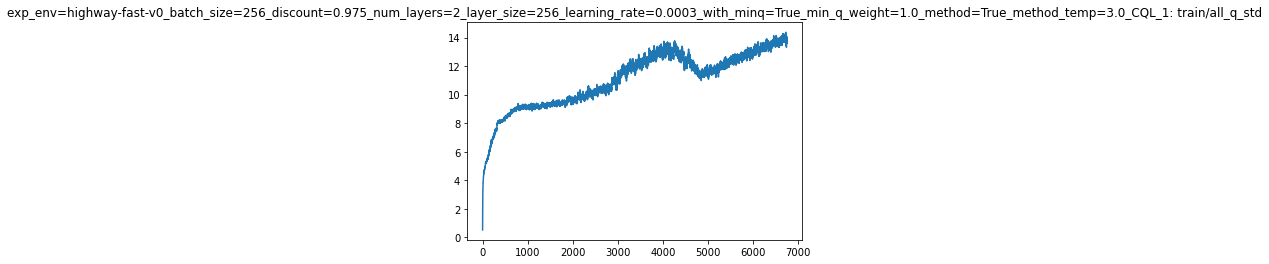

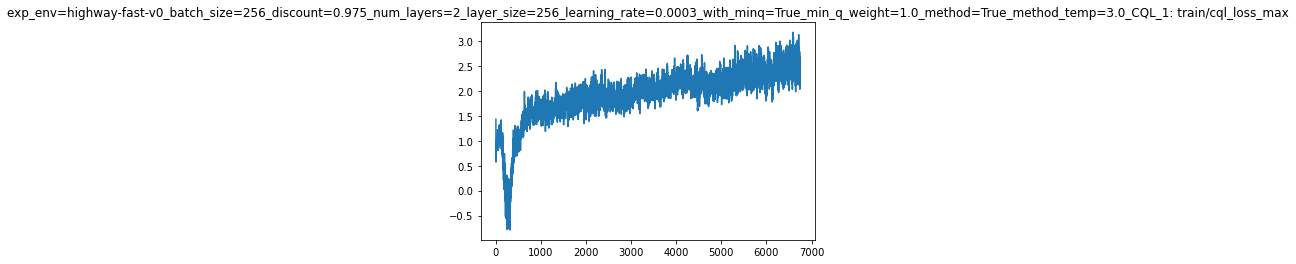

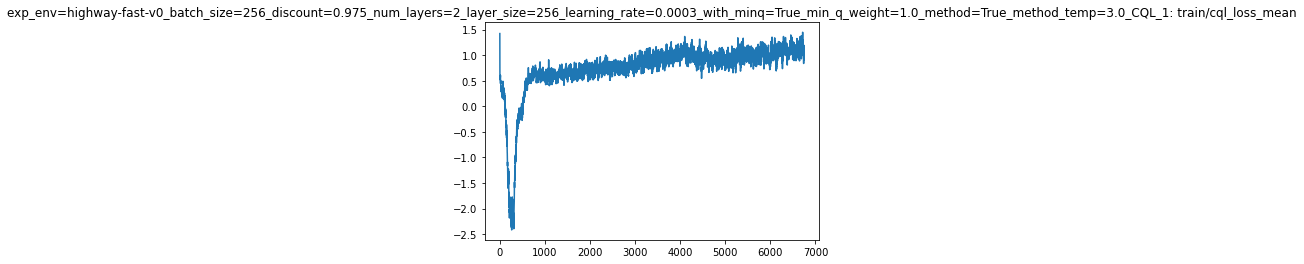

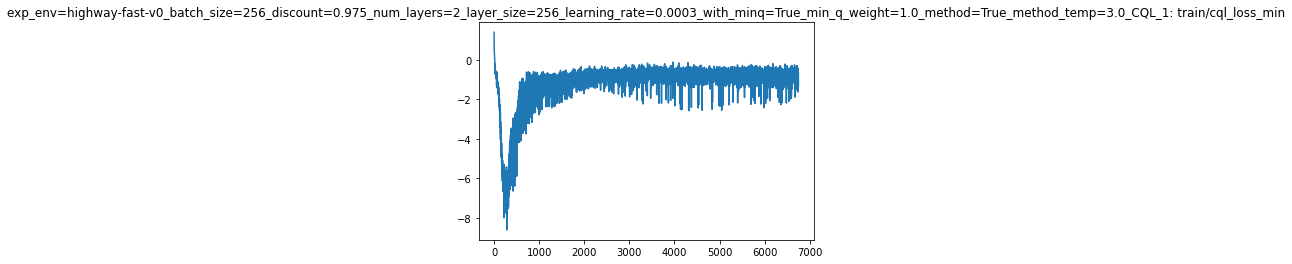

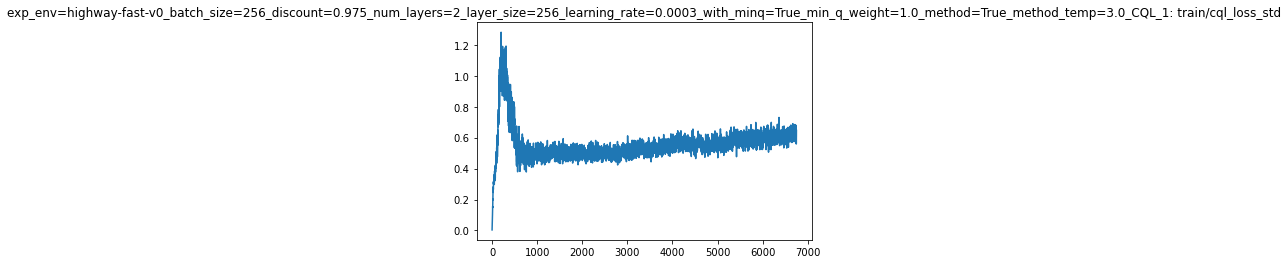

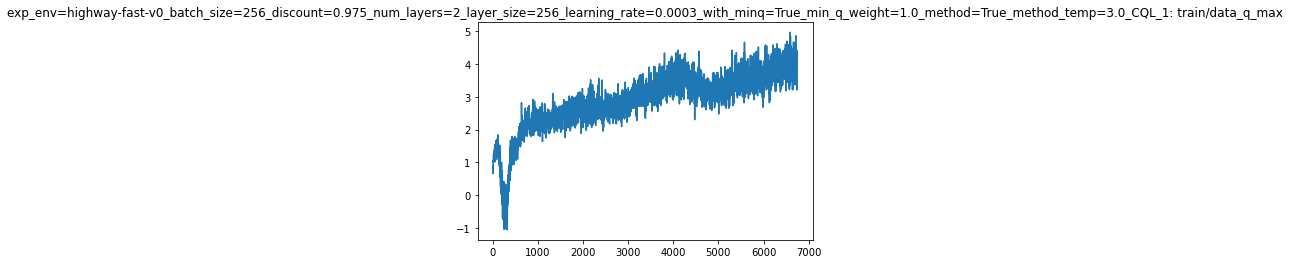

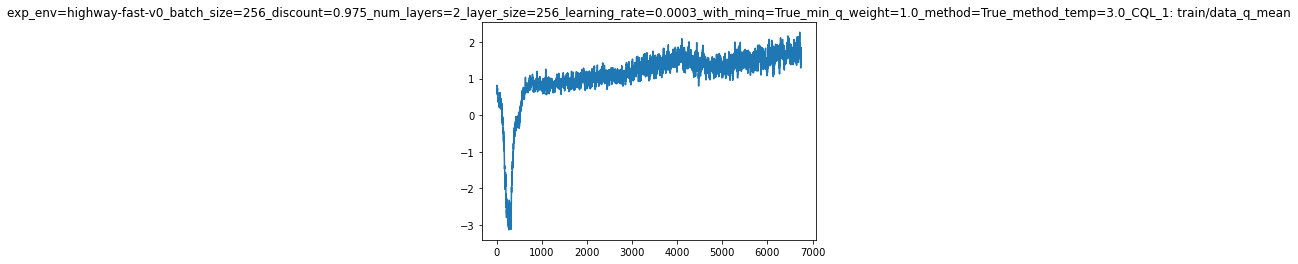

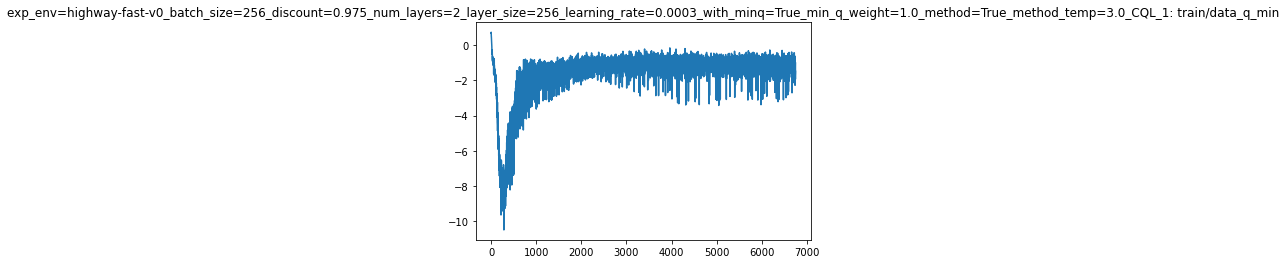

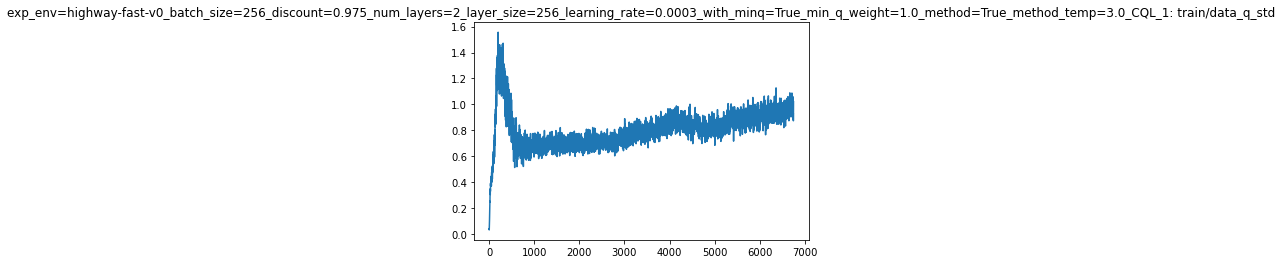

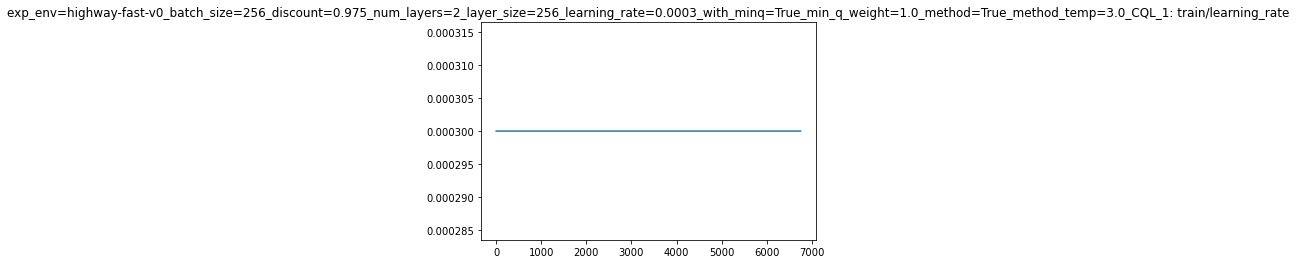

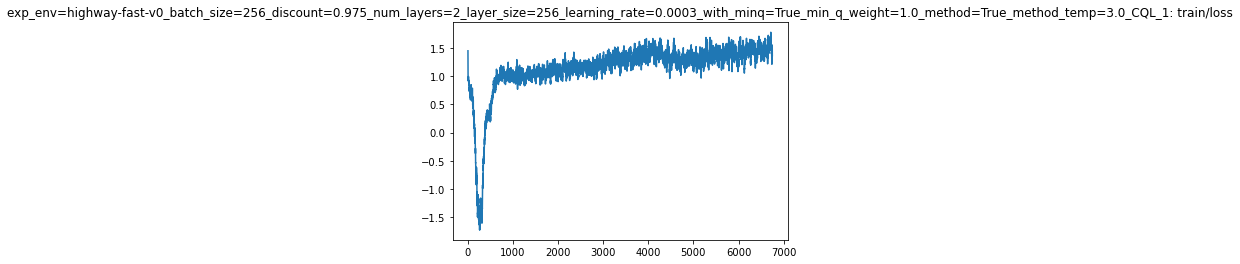

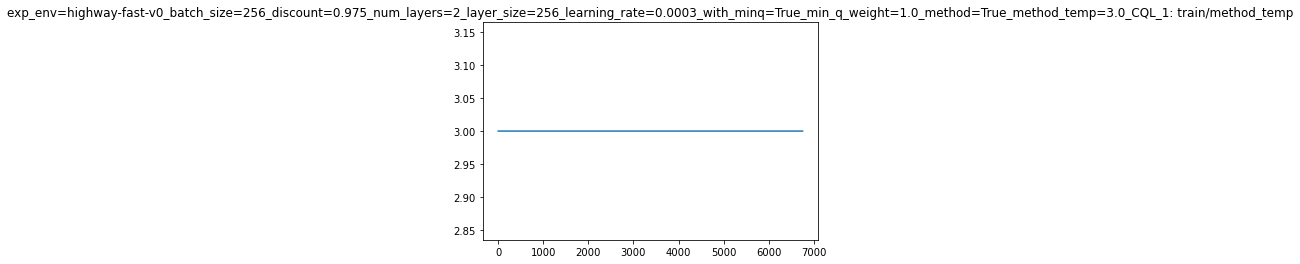

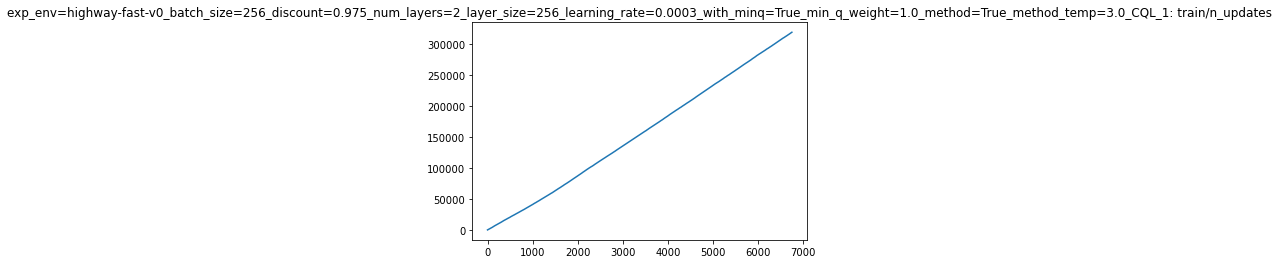

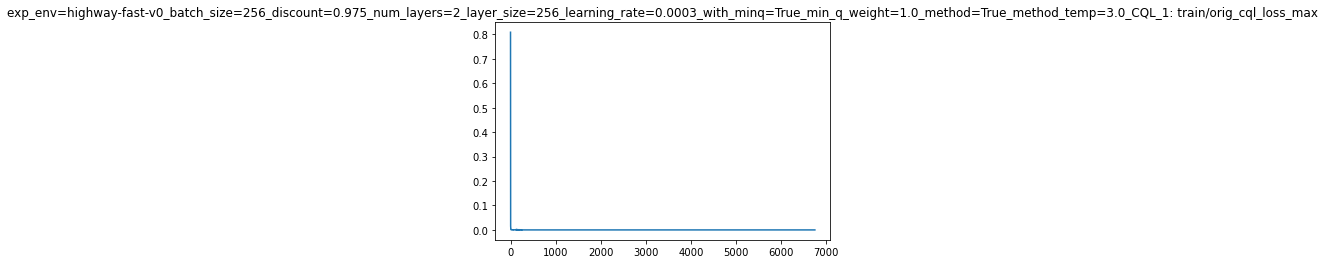

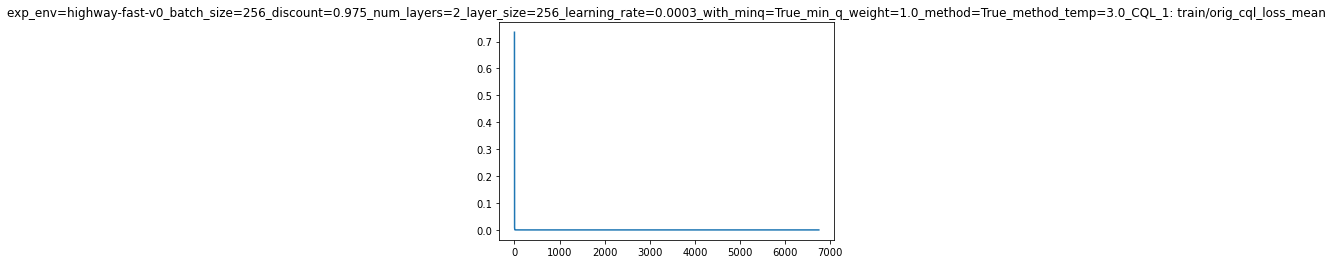

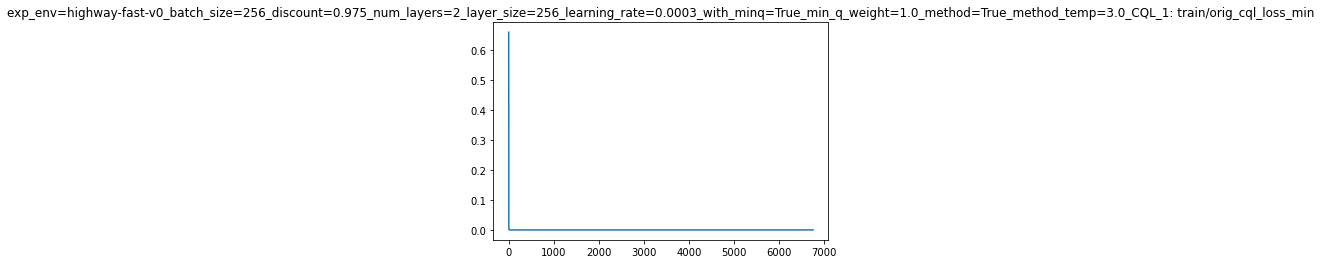

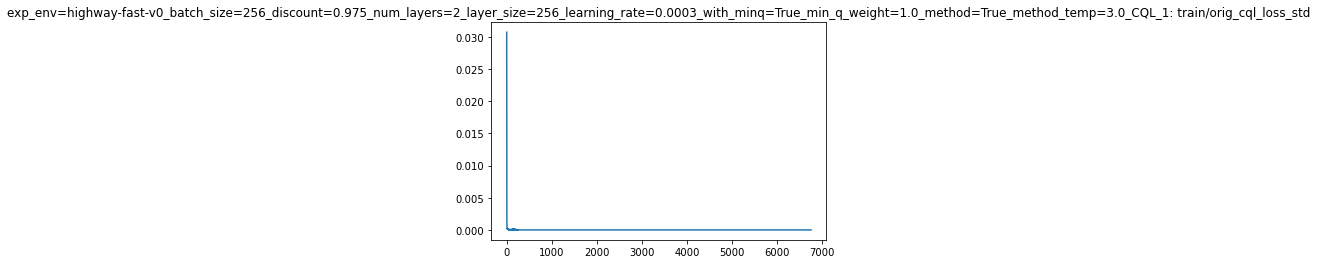

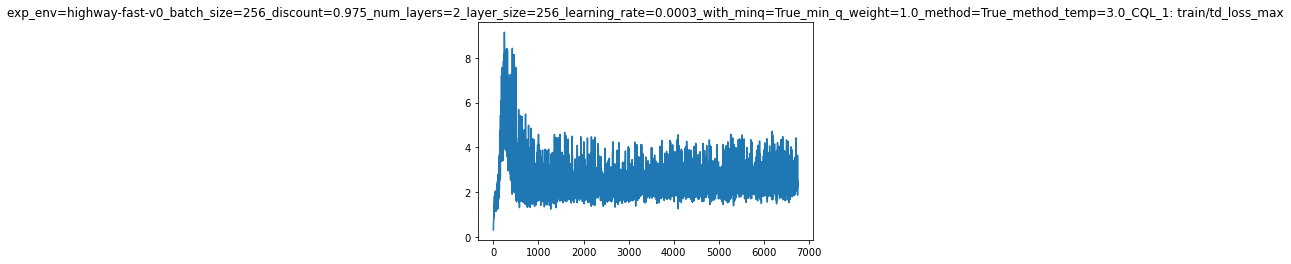

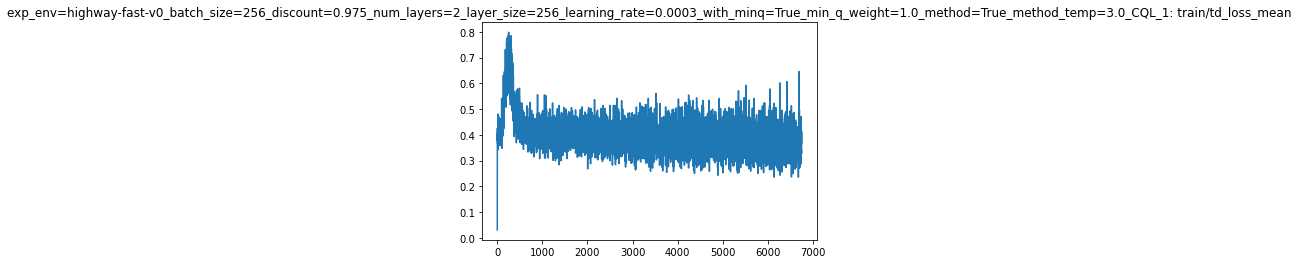

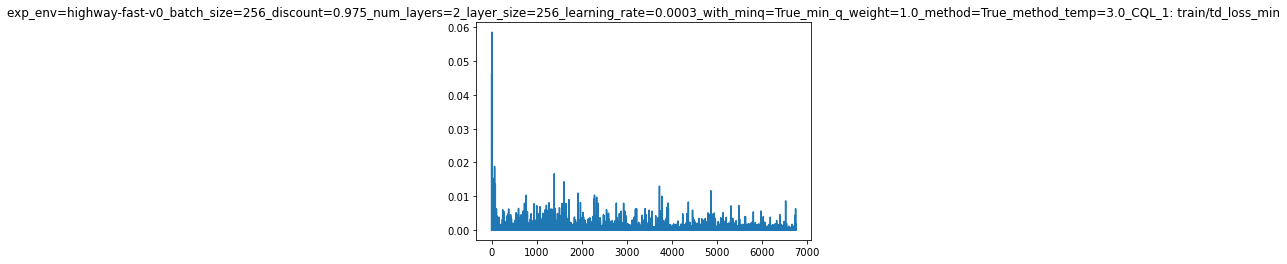

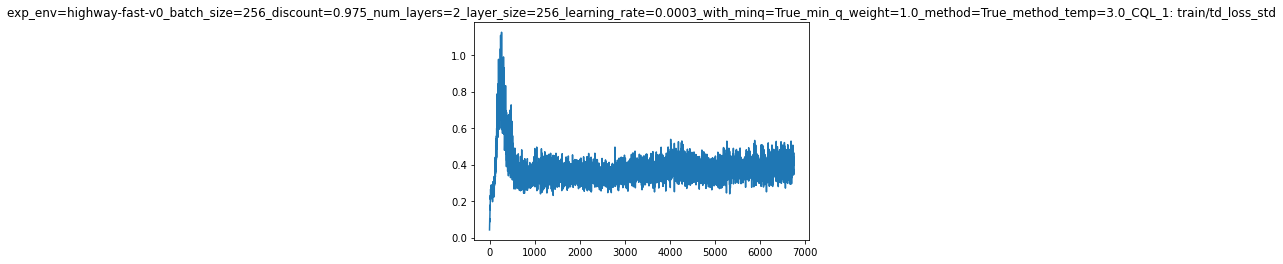

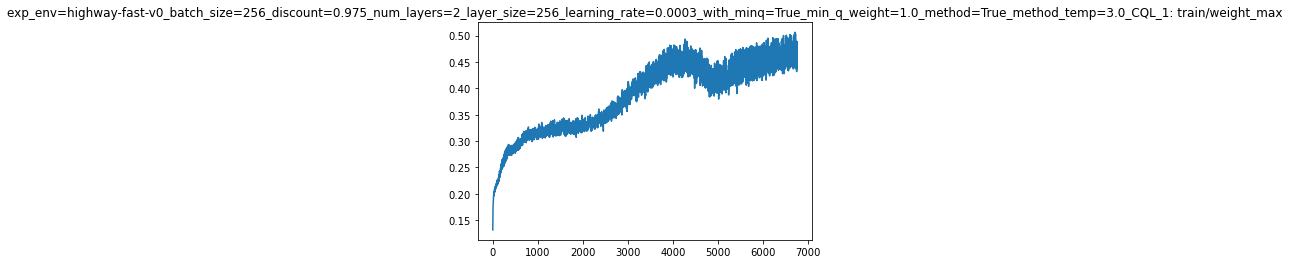

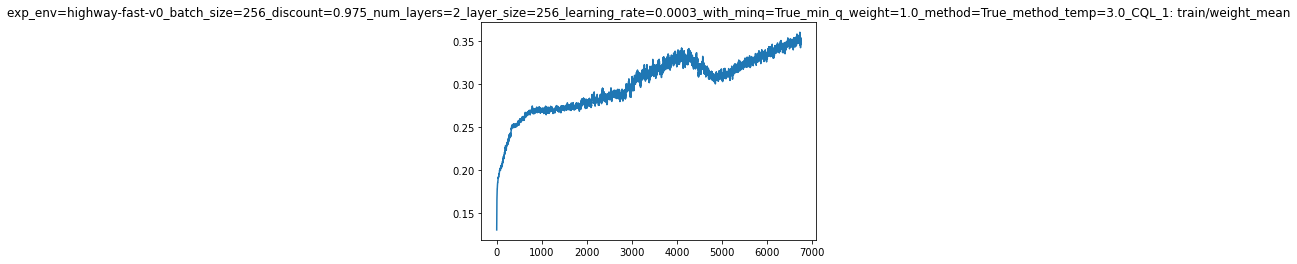

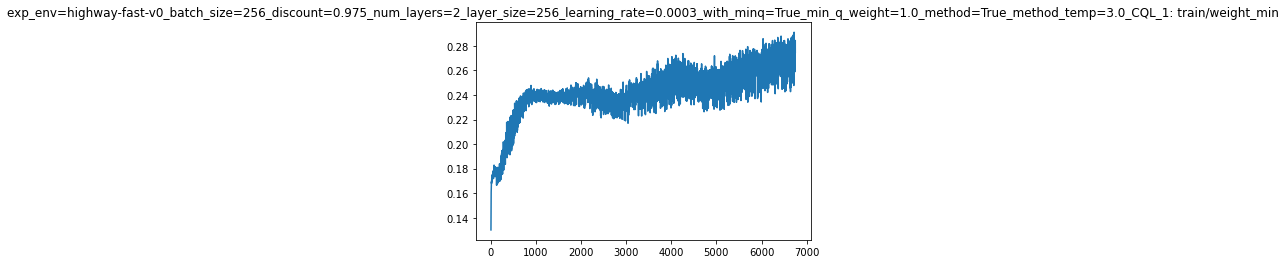

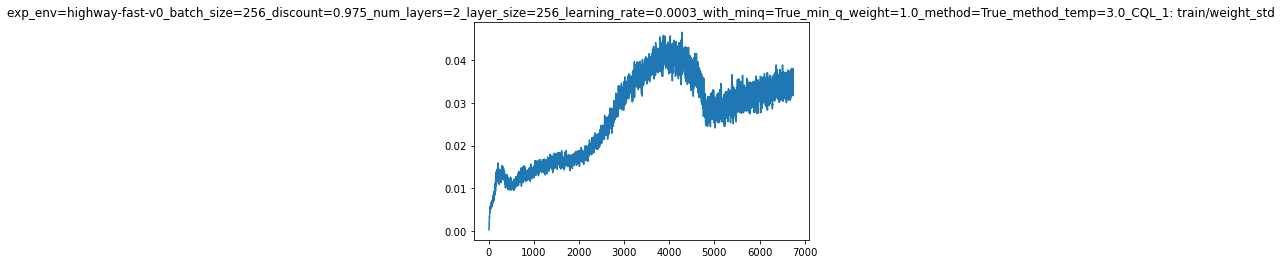

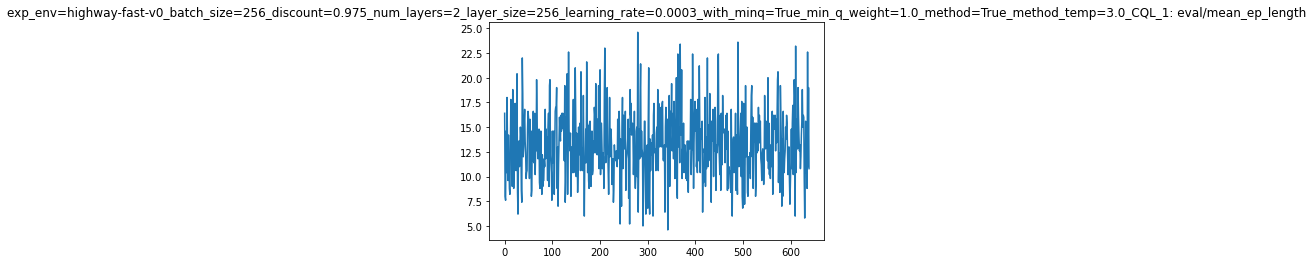

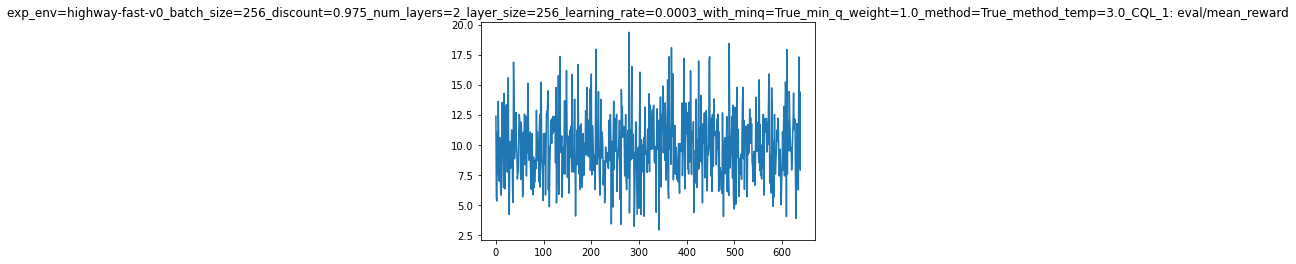

In [29]:
for x in lst:
    name = x.split('/')[-3] + '_' + x.split('/')[-2] + ': '
    plot_tensorboard(x, prefix=name)

In [ ]:
from tensorflow.python.summary.summary_iterator import summary_iterator
from collections import defaultdict
import wandb


def plot_wandb(path, prefix=''):
    print('loading: ', path)
    print('prefix: ', prefix)
    
    wandb.init(project="highway-env", reinit=True, settings=wandb.Settings(start_method="fork"))
    wandb.run.name = prefix
    wandb.run.save()
    
    for e in summary_iterator(path):
        to_log = {}
        for v in e.summary.value:
            to_log[v.tag] = v.simple_value
        wandb.log(to_log)

In [ ]:
for x in lst:
    name = x.split('/')[-3] + '_' + x.split('/')[-2] + ': '
    plot_wandb(x, prefix=name)